<a href="https://colab.research.google.com/github/lauraosede/CE888/blob/main/Lab_2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

# Imports

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import random

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
df.head()

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0


In [4]:
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


# Create bootstrap function


In [5]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
def bootstrap_mean(x, sample_size, n_bootstraps):
  # <---INSERT YOUR CODE HERE--->
  # 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
  data_mean = np.mean(x)
  # 3. Calculate the mean from each bootstrap (i.e., row) and store it. # (This should be an array of n_bootstraps values)
  bs_replicates = np.empty(n_bootstraps)
  for i in range(n_bootstraps):
    # Create a bootstrap sample
    bs_sample = np.random.choice(x,size=len(x), replace = True, p = None )
    sample_mean = np.mean(bs_sample)
    # Get bootstrap replicate and append to bs_replicates
    bs_replicates[i] = sample_mean
    # 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
    CI = np.percentile(x, [5,95])
    lower = CI[0]
    upper = CI[1]
    # 5. Return data_mean, and the lower and upper bounds of your interval
  return data_mean, lower, upper


	


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


     Bootstrap Iterations       Mean  Value
0                     100   9.214286   mean
1                     100   2.000000  lower
2                     100  20.700000  upper
3                    1100   9.214286   mean
4                    1100   2.000000  lower
..                    ...        ...    ...
145                 48100   2.000000  lower
146                 48100  20.700000  upper
147                 49100   9.214286   mean
148                 49100   2.000000  lower
149                 49100  20.700000  upper

[150 rows x 3 columns]


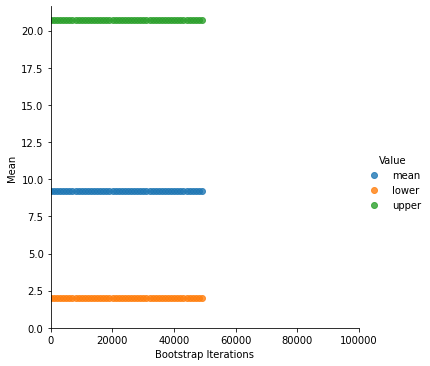

In [6]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)
print(df_boot)


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [35]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  #calculating mean of the array
  data_sum = np.mean(sample)
  #caluclate the summary stat from each bootstrap and store it
  bs_sum_stat = np.empty(n_bootstraps)
  for i in range(n_bootstraps):
    resample = np.random.choice(sample, size = sample_size, replace = True, p = None )
    sample_sum = np.mean(resample)
    # Get bootstrap replicate and append to bs_sum_stat
    bs_sum_stat[i] = sample_sum
    #calculate the lower and upper bounds for a confidence interval passed as parameter
    confidence_interval = np.percentile(bs_sum_stat, [100-ci,ci])
    lower = confidence_interval[0]
    upper = confidence_interval[1]
  return data_sum, lower, upper



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

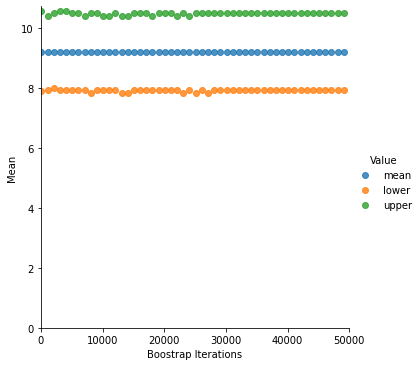

In [36]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [ ]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [37]:
# <---INSERT YOUR CODE HERE--->
vehicle_df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')


In [38]:
vehicle_df.head()

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


In [39]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Current fleet  249 non-null    int64  
 1   New Fleet      79 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


There are missing values in the dataset, so we will use imputation method


In [40]:
median = vehicle_df["New Fleet"].median()
vehicle_df["New Fleet"].fillna(median, inplace=True)

In [41]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Current fleet  249 non-null    int64  
 1   New Fleet      249 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


In [42]:
current_fleet = vehicle_df.values.T[0]
new_fleet = vehicle_df.values.T[1]

In [43]:
mean_current_fleet = np.mean(current_fleet)
print(mean_current_fleet)

20.14457831325301


In [44]:
mean_new_fleet = np.mean(new_fleet)
print(mean_new_fleet)

31.518072289156628


95% confidence interval for the mean of the new fleet in the vehicles dataset using 10000 iterations 

In [46]:
bootstrap_mean_ci(new_fleet, len(new_fleet), 10000, 95)

(31.518072289156628, 31.152610441767067, 31.88755020080321)

95% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations

In [47]:
#function
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  #calculating std of the array
  data_sum = np.std(sample)
  #caluclate the summary stat from each bootstrap and store it
  bs_sum_stat = np.empty(n_bootstraps)
  # Create bootstrap replicates as much as size
  for i in range(n_bootstraps):
    resample = np.random.choice(sample, size = sample_size, replace = True, p = None )
    sample_sum = np.std(resample)
    # Get bootstrap replicate and append to bs_sum_stat
    bs_sum_stat[i] = sample_sum
    #calculate the lower and upper bounds for a confidence interval passed as parameter
    confidence_interval = np.percentile(bs_sum_stat, [100-ci,ci])
    lower = confidence_interval[0]
    upper = confidence_interval[1]
  return data_sum, lower, upper

In [48]:
bootstrap_std_ci(current_fleet, len(current_fleet), 10000, 95)

(6.401805462179708, 5.906301877188859, 6.863250423970473)

Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [65]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    merged_data = np.concatenate((sample1, sample2), axis=None)
    #randomly permutate concatenated data
    count = 0
    for perm in range(n_permutations):
      permutated_data = np.random.permutation(merged_data)
      #spliting permutated data set into two halfs
      length = len(permutated_data)
      sample1 = permutated_data[:int(length/2)]
      sample2 = permutated_data[int(length/2):]
      mean_old = np.mean(sample1)
      mean_new = np.mean(sample2)
      test = mean_old - mean_new
      print(test)
      if test > t_obs:
        count = count +1
        print(count)
      #find p-value
      #divide count by number of permutations
      p_value = count/perm_number
      return pvalue

## hypothesis testing

In [ ]:
#getting the first obsereved value 
ob_mean_old = np.mean(sample_set_old)
print(ob_mean_old)
ob_mean_new = np.mean(sample_set)
print(ob_mean_new)
t_obs = ob_mean_new - ob_mean_old
print(t_obs) 

## voters section

In [ ]:
f = open("/content/voting_data.py", "r")
contents =f.read()

In [ ]:
print(contents)

In [59]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

No of values in PA

In [60]:
len(dem_share_PA)

67

No of values in OH

In [61]:
len(dem_share_OH )

88

The 98% confidence intervals for the means of dem_share_OH using 100000 bootstraps is 

In [63]:
bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 100000, 98)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3967: RuntimeWarning: invalid value encountered in multiply
  x1 = take(ap, indices_below, axis=axis) * weights_below


(44.31818181818182, 42.16329090909091, 46.47318636363636)

The 98% confidence intervals for the means of dem_share_PA using 100000 bootstraps is 

In [64]:
bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 100000, 98)

(45.476417910447765, 43.09820597014925, 47.96552835820896)

# Customer dataset

In [50]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
df_1.head()

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0


In [51]:
customer_df = df_1.values.T[1]
print(customer_df)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [52]:
sample_size = len(customer_df)

The 80% confidence interval for the mean of the customers dataset using 10000 iterations is

In [53]:
bootstrap_mean_ci(customer_df, sample_size, 10000, 80)


(9.214285714285714, 7.857142857142857, 10.5)

The 85% confidence interval for the standard deviation of the customers dataset using 10000 iterations is

In [55]:
bootstrap_std_ci(customer_df, len(customer_df), 10000, 85)

(5.684296305594556, 4.172309104717209, 6.562493926139075)

The 90% confidence interval for the standard deviation of the customers dataset using 10000 iterations is

In [56]:
bootstrap_std_ci(customer_df, len(customer_df), 10000, 90)

(5.684296305594556, 3.614737408251427, 6.797733715987218)